## Plots

No handles with labels found to put in legend.
c:\Users\gbmhu\code\blog\content\programming\artificial-intelligence\understanding-logistic-regression
Creating logistic function gif with changing b1...
No handles with labels found to put in legend.
Creating logistic function gif with changing b0...


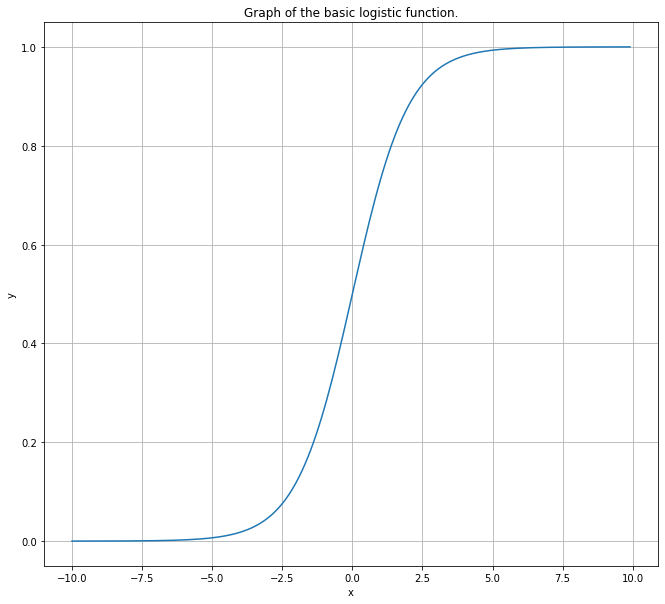

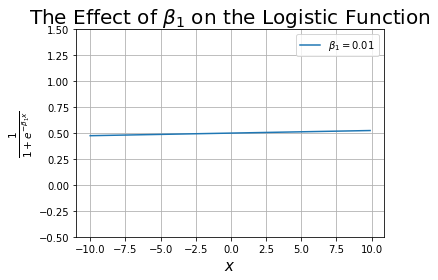

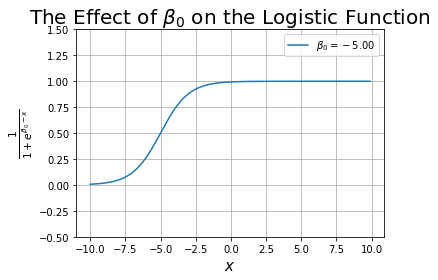

In [28]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


SCRIPT_DIR = os.getcwd() 
print(SCRIPT_DIR)

def main():
    create_basic_logistic_function()
    create_logistic_function_changing_b1()
    create_logistic_function_changing_b0()

def create_basic_logistic_function():
    # Create logistic function graph
    x = np.arange(-10, 10, step=0.1)
    y = 1 / (1 + np.exp(-x))

    fig = plt.figure(figsize=(11,10))
    ax = fig.add_subplot(111)
    ax.plot(x, y, label='logistic function')
    ax.grid()
    ax.set(xlabel='x', ylabel='y', title='Graph of the basic logistic function.')
    plt.savefig(Path(SCRIPT_DIR) / 'graph-logistic-function.png')

def create_logistic_function_changing_b1():
    print(f'Creating logistic function gif with changing b1...')
    fig, ax = plt.subplots()
    x = np.arange(-10, 10, step=0.1)
    i = 0
    y = 1 / (1 + np.exp(-1*(i/100.0)*x))
    line, = ax.plot(x, y)
    ax.set_xlabel(f'$x$', fontsize=15)
    ax.set_ylabel('$\\frac{1}{1 + e^{-\\beta_1 x}}$', fontsize=15)
    ax.set_ylim([-0.5, 1.5])
    ax.set_title('The Effect of $\\beta_1$ on the Logistic Function', fontsize=20)
    ax.legend()
    ax.grid()
    plt.tight_layout()
    def update(i):
        y = 1 / (1 + np.exp(-1*i*x))
        line.set_ydata(y)
        line.set_label(f'$\\beta_1 = {i:.2f}$')
        ax.legend()
        return line, ax 

    frames = 10**(np.linspace(-2, 1, num=100))
    anim = FuncAnimation(fig, update, frames=frames, interval=50)
    anim.save('logistic-function-changing-b1.gif', writer='imagemagick')

def create_logistic_function_changing_b0():
    print(f'Creating logistic function gif with changing b0...')
    fig, ax = plt.subplots()
    x = np.arange(-10, 10, step=0.1)
    i = 0
    y = 1 / (1 + np.exp(-1*(i/100.0)*x))
    line, = ax.plot(x, y)
    ax.set_xlabel(f'$x$', fontsize=15)
    ax.set_ylabel('$\\frac{1}{1 + e^{\\beta_0 - x}}$', fontsize=15)
    ax.set_ylim([-0.5, 1.5])
    ax.set_title('The Effect of $\\beta_0$ on the Logistic Function', fontsize=20)
    ax.legend()
    ax.grid()
    plt.tight_layout()
    def update(i):
        y = 1 / (1 + np.exp(i + -x))
        line.set_ydata(y)
        line.set_label(f'$\\beta_0 = {i:.2f}$')
        ax.legend()
        return line, ax 

    frames = np.linspace(-5, 5, num=100)
    anim = FuncAnimation(fig, update, frames=frames, interval=50)
    anim.save('logistic-function-changing-b0.gif', writer='imagemagick')


main()

## Worked Example

In [21]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [15]:
data = sns.load_dataset('iris')
print(data.shape[0])
data.head()

150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
x = data.iloc[:, 0:-1] # All columns except "species"
y = data.iloc[:, -1] # The "species" column

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train) # Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions = model.predict(x_test)
print(predictions)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


In [19]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
print(accuracy_score(y_test, predictions))

0.9666666666666667
